In [550]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
# device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
#                                    not x.configuration().simulator and x.status().operational==True))
# print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2021-12-03 12:40:13,773: Credentials are already in use. The existing account in the session will be replaced.


In [458]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [553]:
def grovers_algorithm():
    n = 4
    grover_circuit = QuantumCircuit(n)
    grover_circuit = initialize_s(grover_circuit, [0,1])
   
    grover_circuit.cz(0,1) # Oracle

    # Diffusion operator (U_s)
    grover_circuit.h([0,1])
    grover_circuit.z([0,1])
    grover_circuit.cz(0,1)
    grover_circuit.h([0,1])
    
    
    for i in range(6 ):
        grover_circuit.cx(2,3)
#         grover_circuit.delay(10, qarg=2, unit = 'dt')
        grover_circuit.delay(10, unit = 'dt')
        
#         grover_circuit.x(2)
#         grover_circuit.barrier()
    
    return grover_circuit

In [554]:
grover_circuit = grovers_algorithm()
print(grover_circuit)
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

     ┌───┐                 ┌───┐      ┌───┐                 ┌───┐      »
q_0: ┤ H ├────────■────────┤ H ├──────┤ Z ├────────■────────┤ H ├──────»
     ├───┤        │        ├───┤      ├───┤        │        ├───┤      »
q_1: ┤ H ├────────■────────┤ H ├──────┤ Z ├────────■────────┤ H ├──────»
     └───┘┌───────────────┐└───┘┌─────┴───┴─────┐     ┌─────┴───┴─────┐»
q_2: ──■──┤ Delay(10[dt]) ├──■──┤ Delay(10[dt]) ├──■──┤ Delay(10[dt]) ├»
     ┌─┴─┐├───────────────┤┌─┴─┐├───────────────┤┌─┴─┐├───────────────┤»
q_3: ┤ X ├┤ Delay(10[dt]) ├┤ X ├┤ Delay(10[dt]) ├┤ X ├┤ Delay(10[dt]) ├»
     └───┘└───────────────┘└───┘└───────────────┘└───┘└───────────────┘»
«     ┌───────────────┐┌───────────────┐┌───────────────┐┌───────────────┐»
«q_0: ┤ Delay(10[dt]) ├┤ Delay(10[dt]) ├┤ Delay(10[dt]) ├┤ Delay(10[dt]) ├»
«     ├───────────────┤├───────────────┤├───────────────┤├───────────────┤»
«q_1: ┤ Delay(10[dt]) ├┤ Delay(10[dt]) ├┤ Delay(10[dt]) ├┤ Delay(10[dt]) ├»
«     └───────────────┘├───────────────

<IPython.core.display.Math object>

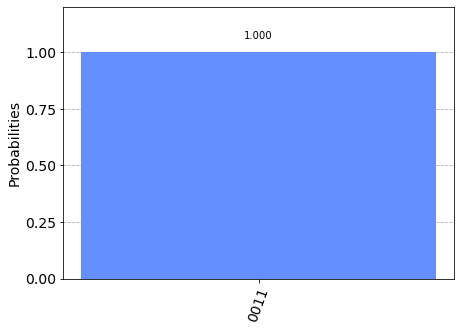

In [555]:
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [556]:


device = provider.get_backend('ibmq_lima')
print("Running on device: ", device)


Running on device:  ibmq_lima


In [557]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3, scheduling_method='alap')
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


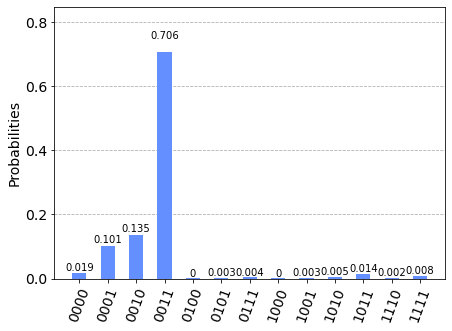

In [558]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

In [559]:
print(transpiled_grover_circuit)

               ┌──────────────────┐                                        »
ancilla_0 -> 0 ┤ Delay(33168[dt]) ├────────────────────────────────────────»
               └──────────────────┘┌───────────────┐      ┌───────────────┐»
      q_2 -> 1 ─────────■──────────┤ Delay(10[dt]) ├──■───┤ Delay(10[dt]) ├»
                      ┌─┴─┐        ├───────────────┤┌─┴─┐ ├───────────────┤»
      q_3 -> 2 ───────┤ X ├────────┤ Delay(10[dt]) ├┤ X ├─┤ Delay(10[dt]) ├»
               ┌──────┴───┴──────┐ └──┬──────────┬─┘├───┴┐└───────────────┘»
      q_1 -> 3 ┤ Delay(4032[dt]) ├────┤ Rz(-π/2) ├──┤ √X ├─────────────────»
               ├─────────────────┤    └┬────────┬┘  ├────┤   ┌─────────┐   »
      q_0 -> 4 ┤ Delay(4032[dt]) ├─────┤ Rz(-π) ├───┤ √X ├───┤ Rz(π/2) ├───»
               └─────────────────┘     └────────┘   └────┘   └─────────┘   »
       meas: 4/════════════════════════════════════════════════════════════»
                                                                           »

In [404]:
print(transpiled_grover_circuit)

                                    ┌──────────────┐      ┌──────────────┐     »
      q_2 -> 0 ──────────■──────────┤ Delay(0[dt]) ├──■───┤ Delay(0[dt]) ├──■──»
                       ┌─┴─┐        ├──────────────┤┌─┴─┐ ├──────────────┤┌─┴─┐»
      q_3 -> 1 ────────┤ X ├────────┤ Delay(0[dt]) ├┤ X ├─┤ Delay(0[dt]) ├┤ X ├»
               ┌───────┴───┴───────┐└──────────────┘└───┘ └──────────────┘└───┘»
ancilla_0 -> 2 ┤ Delay(299280[dt]) ├───────────────────────────────────────────»
               ├───────────────────┤  ┌──────────┐  ┌────┐                ┌───┐»
      q_0 -> 3 ┤ Delay(270208[dt]) ├──┤ Rz(-π/2) ├──┤ √X ├────────────────┤ X ├»
               ├───────────────────┤  └┬────────┬┘  ├────┤  ┌─────────┐   └─┬─┘»
      q_1 -> 4 ┤ Delay(270208[dt]) ├───┤ Rz(-π) ├───┤ √X ├──┤ Rz(π/2) ├─────■──»
               └───────────────────┘   └────────┘   └────┘  └─────────┘        »
       meas: 4/════════════════════════════════════════════════════════════════»
                            

QiskitBackendNotFoundError: 'No backend matches the criteria'

In [38]:
real_device = provider.get_backend('ibmq_lima')
properties = real_device.properties()
coupling_map = real_device.configuration().coupling_map
coupling_map

[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]

In [545]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = provider.get_backend('ibmq_lima')
backend

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>